In [2]:
library(igraph)
library(numbers)
library(SuperExactTest)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Loading required package: grid

Attaching package: ‘SuperExactTest’

The following object is masked from ‘package:igraph’:

    union

The following objects are masked from ‘package:base’:

    intersect, union



# Paper

In [2]:
load(url("https://ndownloader.figshare.com/files/23552735"))

In [3]:
for (i in 1: length(networks)){print(networks[i]); print(graph.list[[i]])}

[1] "Homo_skull"
IGRAPH 1f38b7c UN-- 21 64 -- 
+ attr: name (v/c)
+ edges from 1f38b7c (vertex names):
 [1] Occipital     --Parietal.Left   Occipital     --Parietal.Right 
 [3] Occipital     --Temporal.Left   Occipital     --Temporal.Right 
 [5] Occipital     --Sphenoidal      Parietal.Left --Parietal.Right 
 [7] Parietal.Left --Temporal.Left   Parietal.Left --Sphenoidal     
 [9] Parietal.Left --Frontal         Parietal.Right--Temporal.Right 
[11] Parietal.Right--Sphenoidal      Parietal.Right--Frontal        
[13] Temporal.Left --Sphenoidal      Temporal.Left --Zygomatic.Left 
[15] Temporal.Right--Sphenoidal      Temporal.Right--Zygomatic.Right
+ ... omitted several edges
[1] "Homo_skull_variation"
IGRAPH 1f38deb UN-- 22 66 -- 
+ attr: name (v/c)
+ edges from 1f38deb (vertex names):
 [1] Wormian       --Occipital       Wormian       --Parietal.Left  
 [3] Occipital     --Parietal.Left   Occipital     --Parietal.Right 
 [5] Occipital     --Temporal.Left   Occipital     --Temporal.Righ

In [105]:
# find node-based modules
g<-graph.list[[1]]
mod<-list()
for (i in 1:vcount(g)){
    m<-cluster_spinglass(g, vertex=i)
    mod[[i]]<-V(g)$name[m$community]
}
names(mod)<-V(g)$name

# filter out redundancies
clean_mod<-mod
for (i in 1:(length(clean_mod)-1)){
    j<-i+1
    while (j<=length(clean_mod)){
        if (setequal(clean_mod[[i]], clean_mod[[j]])==TRUE){clean_mod[[j]]<-NA} # if i == j
        if (all(is.element(clean_mod[[i]], clean_mod[[j]]))==TRUE) {clean_mod[[i]]<-NA}  # if i belongs j
        if (all(is.element(clean_mod[[j]], clean_mod[[i]]))==TRUE) {clean_mod[[j]]<-NA} # if j belongs i
        j<-j+1
    }
}

clean_mod<-clean_mod[!is.na(clean_mod)]
print(clean_mod)

$Occipital
[1] "Occipital"       "Parietal.Left"   "Parietal.Right"  "Temporal.Left"  
[5] "Temporal.Right"  "Sphenoidal"      "Zygomatic.Right" "Zygomatic.Left" 
[9] "Frontal"        

$Sphenoidal
 [1] "Sphenoidal"      "Occipital"       "Parietal.Left"   "Parietal.Right" 
 [5] "Temporal.Left"   "Temporal.Right"  "Zygomatic.Left"  "Zygomatic.Right"
 [9] "Palatine.Left"   "Palatine.Right"  "Vomer"          

$Frontal
 [1] "Frontal"            "Ethmoidal"          "Nasal.Left"        
 [4] "Nasal.Right"        "Maxilla.Left"       "Maxilla.Right"     
 [7] "Lacrimal.Left"      "Lacrimal.Right"     "Nasal.Concha.Right"
[10] "Nasal.Concha.Left" 

$Ethmoidal
 [1] "Ethmoidal"          "Nasal.Left"         "Nasal.Right"       
 [4] "Maxilla.Left"       "Maxilla.Right"      "Lacrimal.Left"     
 [7] "Lacrimal.Right"     "Palatine.Left"      "Palatine.Right"    
[10] "Nasal.Concha.Left"  "Nasal.Concha.Right" "Vomer"             



In [159]:
ls

function (name, pos = -1L, envir = as.environment(pos), all.names = FALSE, 
    pattern, sorted = TRUE) 
{
    if (!missing(name)) {
        pos <- tryCatch(name, error = function(e) e)
        if (inherits(pos, "error")) {
            name <- substitute(name)
            if (!is.character(name)) 
                name <- deparse(name)
            warning(gettextf("%s converted to character string", 
                sQuote(name)), domain = NA)
            pos <- name
        }
    }
    all.names <- .Internal(ls(envir, all.names, sorted))
    if (!missing(pattern)) {
        if ((ll <- length(grep("[", pattern, fixed = TRUE))) && 
            ll != length(grep("]", pattern, fixed = TRUE))) {
            if (pattern == "[") {
                pattern <- "\\["
                warning("replaced regular expression pattern '[' by  '\\\\['")
            }
            else if (length(grep("[^\\\\]\\[<-", pattern))) {
                pattern <- sub("\\[<-", "\\\\\\[<-", pattern)
                warning("replaced '[<-' by '\\\\[<-' in regular expression pattern")
            }
        }
        grep(pattern, all.names, value = TRUE)
    }
    else all.names
}
<bytecode: 0x55fecd6beb30>
<environment: namespace:base>

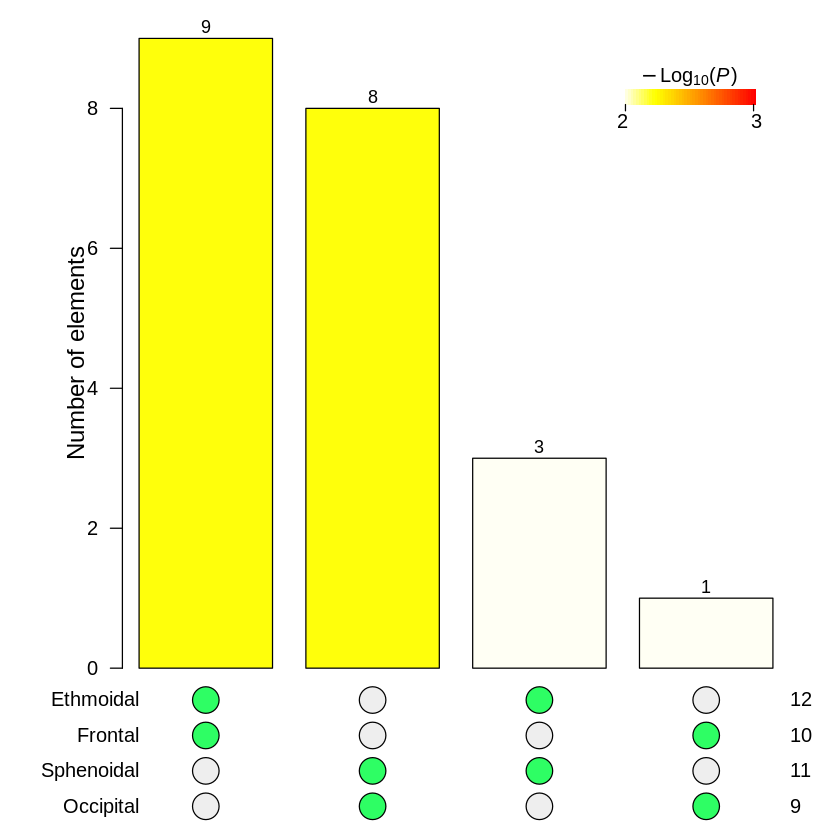

In [128]:
# check overloap between node-based modules
res<-supertest(clean_mod,n=vcount(g), degree = c(2:length(clean_mod)))
pcorrect<-(0.05/(bell(length(clean_mod))-length(clean_mod)))

plot(res, sort.by = 'p-value', degree = c(2:length(clean_mod)),
    Layout='landscape', keep.empty.intersections=FALSE,min.intersection.size=1,
    minMinusLog10PValue=abs(log10(pcorrect)))

In [131]:
# details
facial<-sort(unique(c(clean_mod$Ethmoidal, clean_mod$Frontal)))
cranial<-sort(unique(c(clean_mod$Sphenoidal, clean_mod$Occipital)))
print(facial)

 [1] "Ethmoidal"          "Frontal"            "Lacrimal.Left"     
 [4] "Lacrimal.Right"     "Maxilla.Left"       "Maxilla.Right"     
 [7] "Nasal.Concha.Left"  "Nasal.Concha.Right" "Nasal.Left"        
[10] "Nasal.Right"        "Palatine.Left"      "Palatine.Right"    
[13] "Vomer"             


In [133]:
print(cranial)

 [1] "Frontal"         "Occipital"       "Palatine.Left"   "Palatine.Right" 
 [5] "Parietal.Left"   "Parietal.Right"  "Sphenoidal"      "Temporal.Left"  
 [9] "Temporal.Right"  "Vomer"           "Zygomatic.Left"  "Zygomatic.Right"


In [134]:
print(intersect(facial, cranial))

[1] "Frontal"        "Palatine.Left"  "Palatine.Right" "Vomer"         


In [154]:
# testing
vids<-c(1:vcount(g))[is.element(V(g)$name, facial)]
in.links<-degree(induced_subgraph(g, vids))
out.links<-degree(g, vids)-in.links
res<-wilcox.test(in.links, out.links, alternative="greater")
print("Facial module")

Warning message in wilcox.test.default(in.links, out.links, alternative = "greater"):
“cannot compute exact p-value with ties”

[1] "Facial module"


In [155]:
print(res)


	Wilcoxon rank sum test with continuity correction

data:  in.links and out.links
W = 161.5, p-value = 3.124e-05
alternative hypothesis: true location shift is greater than 0



Occipital 
        5

# Our data

In [17]:
g<-read_graph("a.lgl", format='lgl')
g

IGRAPH dd9c5a6 UN-- 245 686 -- 
+ attr: name (v/c)
+ edges from dd9c5a6 (vertex names):
 [1] 左嗅觉细胞（嗅觉粘膜）--左嗅脑                
 [2] 右嗅觉细胞（嗅觉粘膜）--右嗅脑                
 [3] 左侧左半视网膜        --右丘脑外侧膝状体      
 [4] 左侧右半视网膜        --左丘脑外侧膝状体      
 [5] 右丘脑外侧膝状体      --右侧左半视网膜        
 [6] 左丘脑外侧膝状体      --右侧右半视网膜        
 [7] 左丘脑外侧膝状体      --左上丘                
 [8] 右丘脑外侧膝状体      --右上丘                
+ ... omitted several edges

In [14]:
# find node-based modules
mod<-list()
for (i in 1:vcount(g)){
    m<-cluster_spinglass(g, vertex=i)
    mod[[i]]<-V(g)$name[m$community]
}
names(mod)<-V(g)$name

# filter out redundancies
clean_mod<-mod
for (i in 1:(length(clean_mod)-1)){
    j<-i+1
    while (j<=length(clean_mod)){
        if (setequal(clean_mod[[i]], clean_mod[[j]])==TRUE){clean_mod[[j]]<-NA} # if i == j
        if (all(is.element(clean_mod[[i]], clean_mod[[j]]))==TRUE) {clean_mod[[i]]<-NA}  # if i belongs j
        if (all(is.element(clean_mod[[j]], clean_mod[[i]]))==TRUE) {clean_mod[[j]]<-NA} # if j belongs i
        j<-j+1
    }
}

clean_mod<-clean_mod[!is.na(clean_mod)]
print(clean_mod)

ERROR: Error in cluster_spinglass(g, vertex = i): At clustertool.cpp:534 : Cannot work with unconnected graph, Invalid value


In [19]:
cluster_spinglass(g, vertex=1)

ERROR: Error in cluster_spinglass(g, vertex = 1): At clustertool.cpp:534 : Cannot work with unconnected graph, Invalid value
